Precision = 82 / ( 82 + 0 ) = 1.0
Recall    = 82 / ( 82 + 685 ) = 0.10691003911342895

Classification Report:
               precision    recall  f1-score   support

           0      0.910     1.000     0.953      6905
           1      1.000     0.107     0.193       767

    accuracy                          0.911      7672
   macro avg      0.955     0.553     0.573      7672
weighted avg      0.919     0.911     0.877      7672



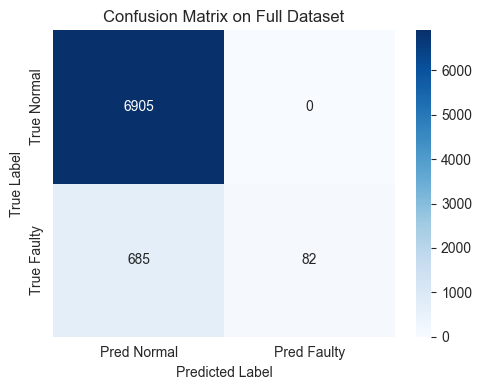

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load model
model = joblib.load("isolation_forest_model.joblib")

# 2. Load data & separate labels
df = pd.read_csv("equipment_anomaly_data.csv").dropna().reset_index(drop=True)
y_true = df.pop('faulty').astype(int)       # only for evaluation

# 3. Select numeric features (everything except 'faulty')
X = df.select_dtypes(include=[np.number])

# 4. Scale features (refit scaler on test data; ideally reuse train‐scaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Predict
raw = model.predict(X_scaled)               #  1→normal, -1→anomaly
y_pred = np.where(raw == 1, 0, 1)           # 0=Normal, 1=Anomaly

# 6. Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
tn, fp, fn, tp = cm.ravel()

print("Precision =", tp, "/ (", tp, "+", fp, ") =", tp/(tp+fp))
print("Recall    =", tp, "/ (", tp, "+", fn, ") =", tp/(tp+fn))
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=3))

# 7. Plot confusion matrix as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred Normal','Pred Faulty'],
    yticklabels=['True Normal','True Faulty']
)
plt.title("Confusion Matrix on Full Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
